# **Setup**

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

# **Data Import**

In [2]:
df = pd.read_csv('diabetes_clean.csv')

print(df.shape)
print(df.columns)
df.sample(10)

(768, 9)
Index(['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'dpf', 'age', 'diabetes'],
      dtype='object')


,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
337,5,115,76,0,0,31.2,0.343,44,1
281,10,129,76,28,122,35.9,0.280,39,0
604,4,183,0,0,0,28.4,0.212,36,1
193,11,135,0,0,0,52.3,0.578,40,1
507,1,130,60,23,170,28.6,0.692,21,0
244,2,146,76,35,194,38.2,0.329,29,0
283,7,161,86,0,0,30.4,0.165,47,1
196,1,105,58,0,0,24.3,0.187,21,0
222,7,119,0,0,0,25.2,0.209,37,0
679,2,101,58,17,265,24.2,0.614,23,0


# **Data Exploration**

C:\Users\aksha\AppData\Local\Temp\ipykernel_32972\36653345.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df['bmi'],df['glucose'],colorizer=df['glucose'],cmap='coolwarm',s=5)


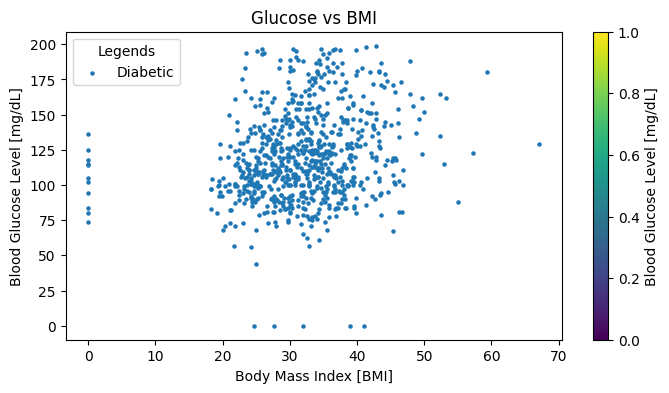

In [34]:
# Visualize Relationship Between Features and Target Variable

plt.figure(figsize=(8,4))
plt.scatter(df['bmi'],df['glucose'],colorizer=df['glucose'],cmap='coolwarm',s=5)
plt.colorbar(label='Blood Glucose Level [mg/dL]')
plt.xlabel('Body Mass Index [BMI]')
plt.ylabel('Blood Glucose Level [mg/dL]')
plt.title('Glucose vs BMI')
plt.legend(['Diabetic','Non-Diabetic'], title='Legends', loc='upper left')
plt.show()

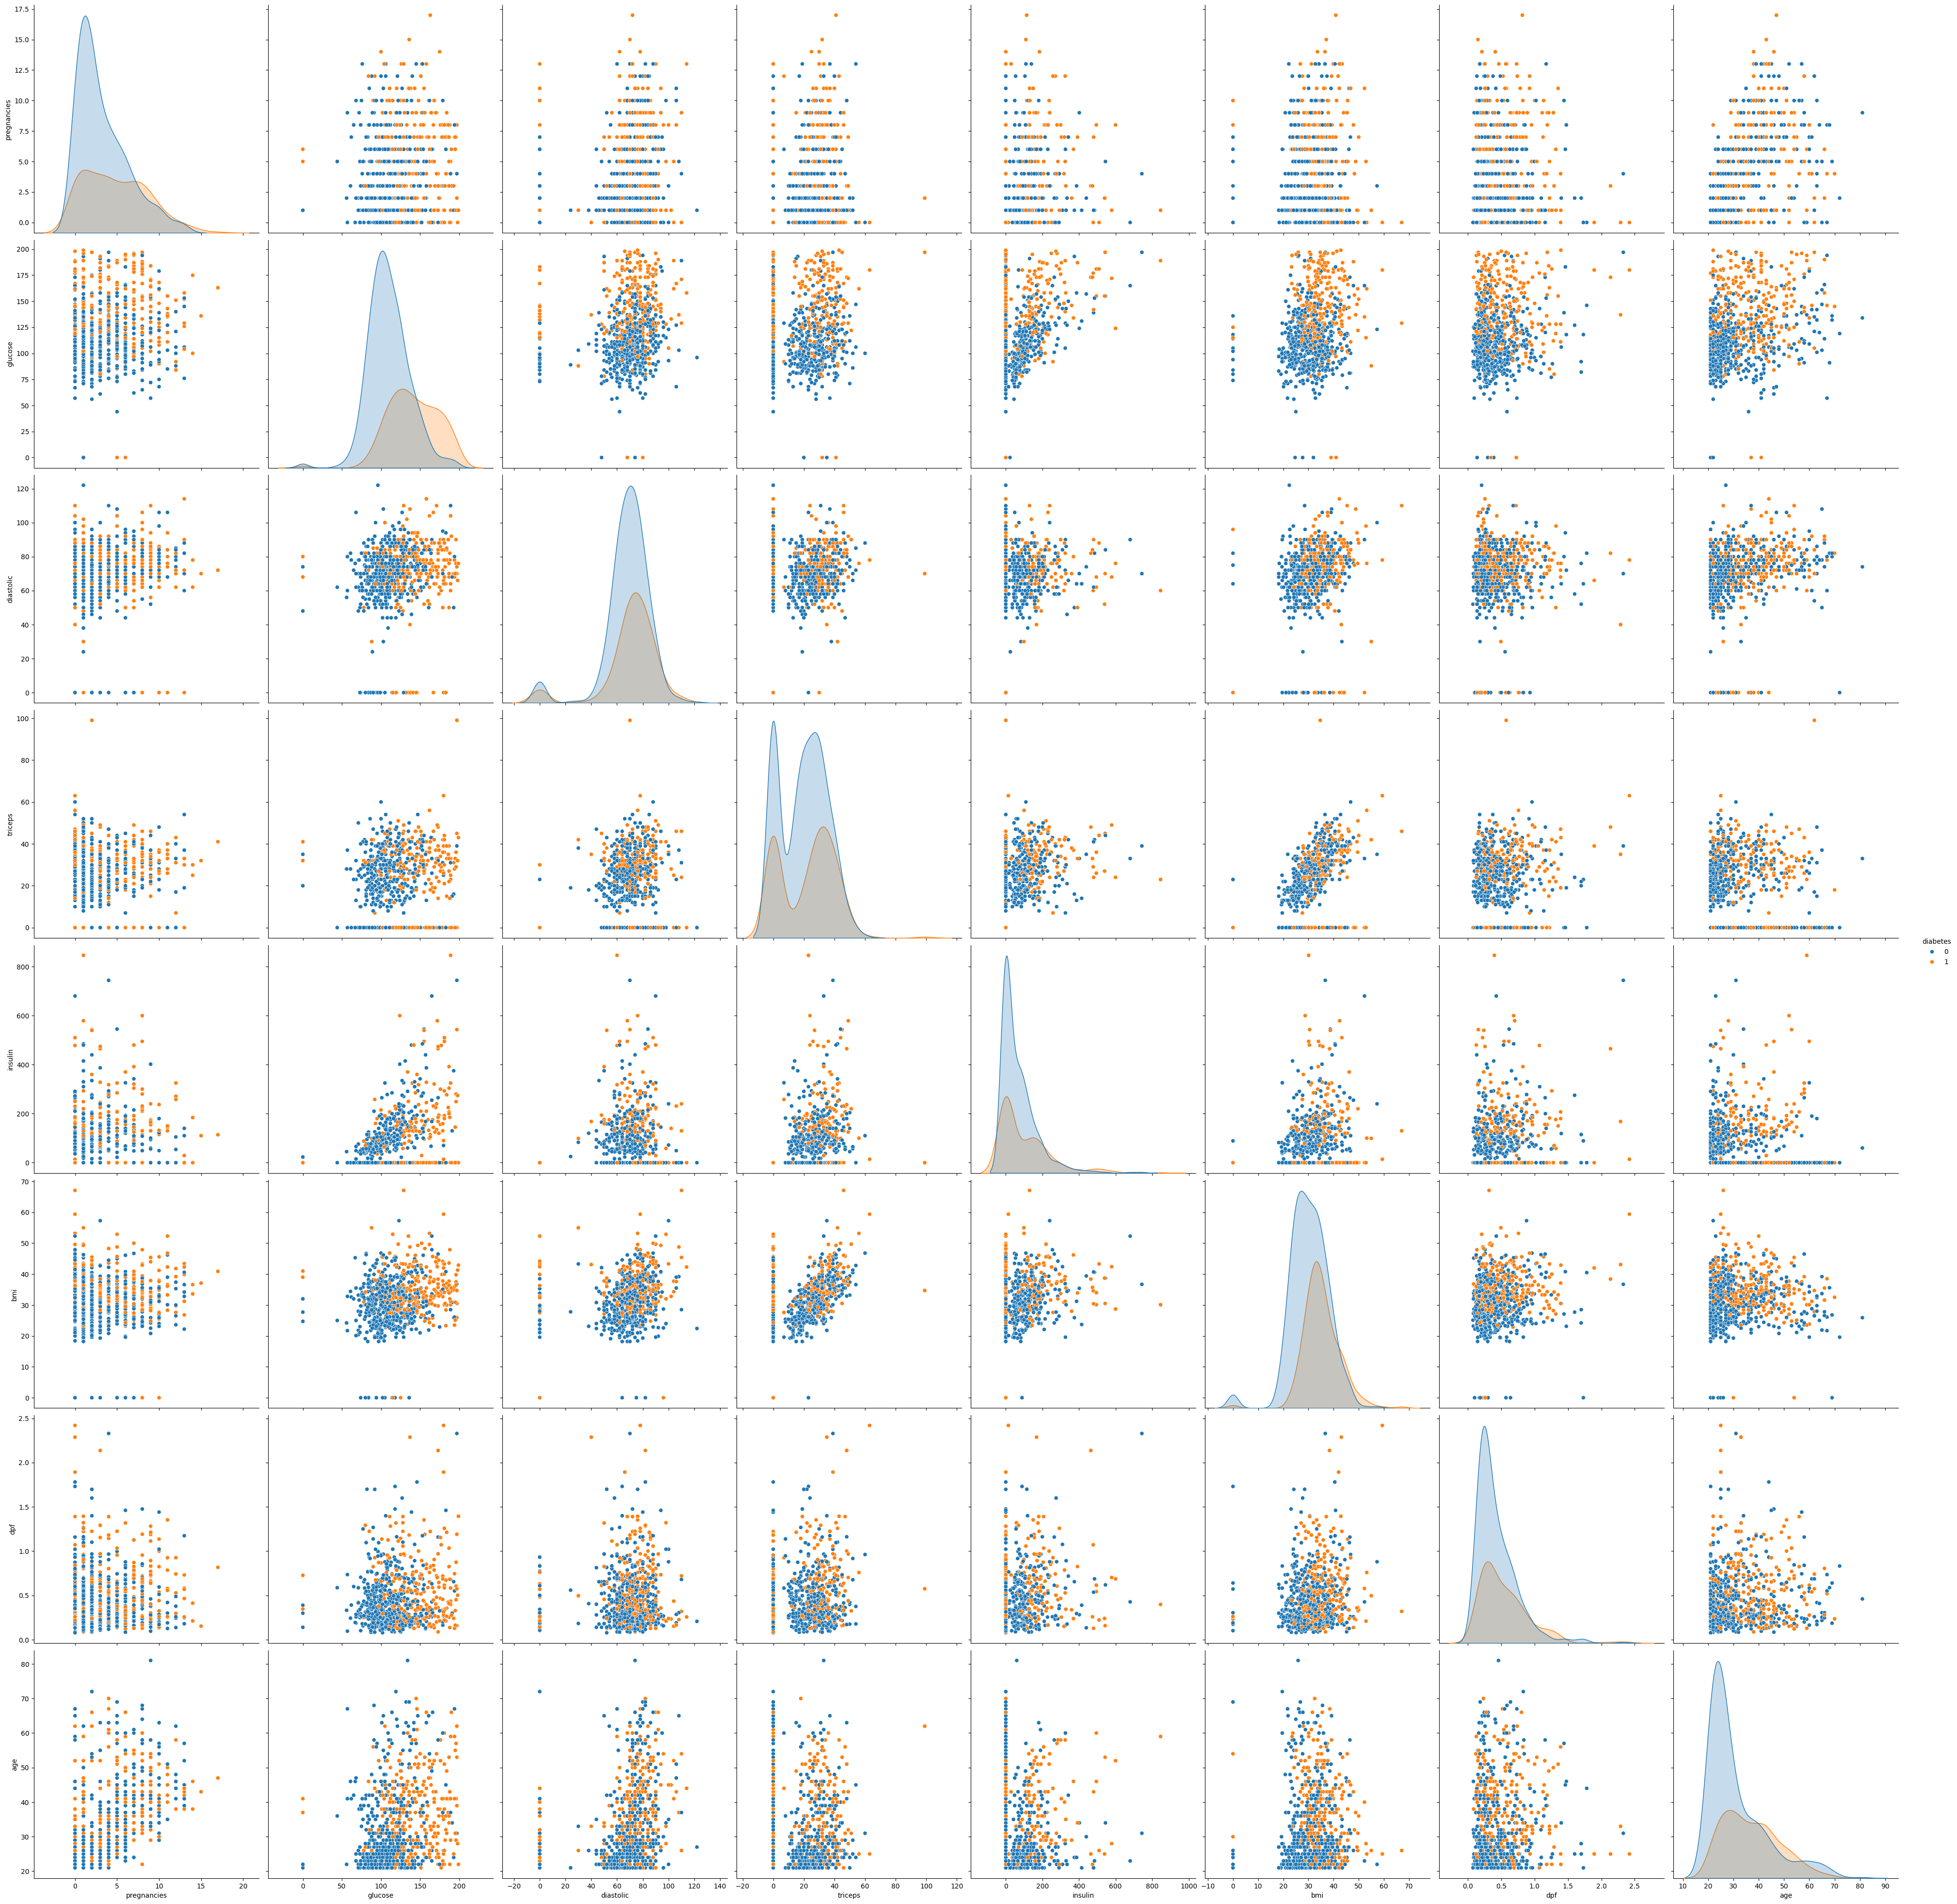

In [13]:
sns.pairplot(df, hue='diabetes', height=5)

# **Predicting Glucose Level**

## **Split Data**

In [35]:
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
X = df.drop(columns=['glucose'],axis=1).values
y = df['glucose'].values

print('Feature Matrix Shape:', X.shape)
print('Target Vector Shape:', y.shape)

Feature Matrix Shape: (768, 8)
Target Vector Shape: (768,)


In [15]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Create Model**

Mean Squared Error: 704.6762254136165
R^2 Score: 0.2997416970153669


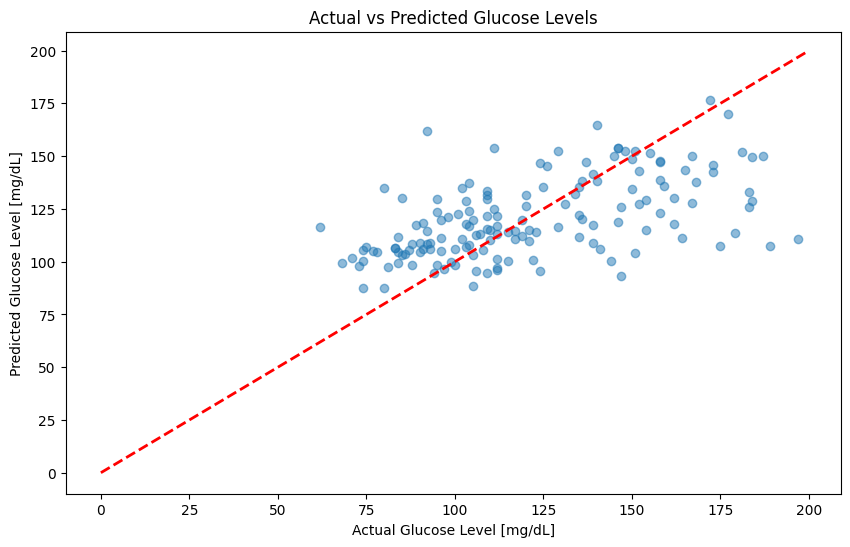

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create Model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R^2 Score:', r2)

# Visualize the predictions vs actual values
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Glucose Level [mg/dL]')
plt.ylabel('Predicted Glucose Level [mg/dL]')
plt.title('Actual vs Predicted Glucose Levels')
plt.show()